In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size':20})

In [3]:
## command: ./serial -n 100;./serial -n 300;./serial -n 1000;./serial -n 3000;./serial -n 10000;./serial -n 30000;./serial -n 100000
## output:
outs = """Simulation Time = 0.00620205 seconds for 100 particles.
Simulation Time = 0.0201123 seconds for 300 particles.
Simulation Time = 0.07357 seconds for 1000 particles.
Simulation Time = 0.332525 seconds for 3000 particles.
Simulation Time = 1.39459 seconds for 10000 particles.
Simulation Time = 4.97021 seconds for 30000 particles.
Simulation Time = 32.7598 seconds for 100000 particles."""

In [6]:
times    = np.array([float(line.split(' ')[3] ) for line in outs.split('\n')])
numparts = np.array([float(line.split(' ')[-2]) for line in outs.split('\n')])

Slope : 1.2409353261924032


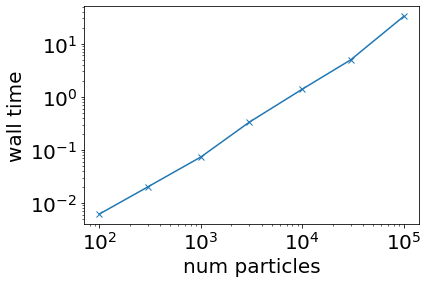

In [17]:
plt.loglog(numparts,times,'-x')
print("Slope :",(np.log(times[-1])-np.log(times[0]))/(np.log(numparts[-1])-np.log(numparts[0])))
plt.xlabel('num particles')
plt.ylabel('wall time');None

In [18]:
32*10**1.2

507.16582158755625